# Project 2 

In [1]:
import pandas as pd
from resources import helper_functions_v2 as cc    # Has data_exploration, data_preperation and data_visualization
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import warnings
from itertools import combinations as cm

from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings("ignore")
%matplotlib inline

## Data Exploration

1. Load Data
2. Look for duplicates, Missing Values, and NaN values
3. Look for correlation to get started
4. Look at the columns with missing values

In [2]:
df = pd.read_csv('data/kc_house_data.csv')    #Read the file
cc.look_dataframe(df)    #Look at dataframe
cc.correlation_with(df, 'price')
cc.look_columns(df, ['heat_source', 'sewer_system'])    # Look at the columns with missing values

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


Column Names: ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'address', 'lat', 'long']
Number of observation: 30155
Duplicates detected


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
4845,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135
4846,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135


N/A detected
Columns with NaN:  ['heat_source', 'sewer_system']
heat_source has 8/30155 unique observations. 
Gas                  20583
Electricity           6465
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64
Number of missing values: 32
sewer_system has 5/30155 unique observations. 
PUBLIC                25777
PRIVATE                4355
PRIVATE RESTRICTED        6
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64
Number of missing values: 14


,heat_source,sewer_system
0,Gas,PUBLIC
1,Oil,PUBLIC
2,Gas,PUBLIC
3,Gas,PUBLIC
4,Electricity,PUBLIC


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   heat_source   30123 non-null  object
 1   sewer_system  30141 non-null  object
dtypes: object(2)
memory usage: 471.3+ KB


None

### Column Infos
State the columns that are being used

In [3]:
all_columns = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors'
               , 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade', 'heat_source'
               , 'sewer_system', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built'
               , 'yr_renovated', 'address', 'lat', 'long']

obj_categorical = ['waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade', 'heat_source' , 'sewer_system']
continuous = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio',]
num_categorical = ['yr_renovated', 'yr_built',  'bedrooms', 'bathrooms', 'floors']
                   
useless_columns = ['id', 'date', 'address', 'lat', 'long']

## **Actions Needed**
1. Delete duplicates
2. Remove missing values
3. Remove unnecessary rows and columns
4. Remove Outliers
5. Group Small samples categories

## Data Preperations
**Main Dataframe with the least changes** <br>
df_cleaned: Removed outliers, rows, columns and replaced grade naming convention <br>
df_num: All the columns that are numbers including price <br>
df_obj: All the columns that are objects not including price <br>
**Used mainly for plotting** <br>
df_num_cat: All the columns that are categorical integers with price <br>
df_obj_cat All the columns that are categorical objects with price <br>
df_num_only All the columns that are continuous data type with price <br>
**Results with correlation (Only numerical variables)** <br>
corr_all: zip file for the correlation from df_cleaned <br>
best_corr: Dictionary of the corr_all sorted by the best correlation, cut off the last three due to usage <br>

In [4]:
df_cleaned = cc.check_and_drop(df)    ## Dropped and removed rows that has small amount of missing values
df_cleaned = cc.outliers_remove(df_cleaned, 'price')    ## Remove outliers of price
df_cleaned.drop(labels = useless_columns, axis = 1, inplace = True)    # Drop columns that wont be useful right now
df_cleaned.drop(df_cleaned.loc[df_cleaned['sqft_living'] == 0].index, inplace = True)    ## Found a house that has sqft_living of 0 which messes with some plotting

df_cleaned['house_age'] = df_cleaned['yr_built'].max() - df_cleaned['yr_built'] 
df_cleaned['relative_age'] = df_cleaned['house_age']
df_cleaned['relative_age'].loc[df_cleaned['yr_renovated'] > 0] = df_cleaned['yr_built'].max() - df_cleaned['yr_renovated']

df_cleaned['sqft_living'] = df_cleaned['sqft_living'] - df_cleaned['sqft_living'].min()

## Map dictionary to change the strings in integer. 
grade_map = {'7 Average': 7, '8 Good': 8, '9 Better': 9, '6 Low Average': 6, '10 Very Good': 10, '5 Fair': 5, 
             '11 Excellent': 11, '4 Low': 4, '12 Luxury':12, '3 Poor': 3, '13 Mansion': 13, '2 Substandard' : 2}
df_cleaned.replace(grade_map, inplace= True)

Number of Missing Values: 46
Dropping rows: heat_source
Dropping rows: sewer_system
Number of duplicates: 1
Removed 1 duplicates
1214 observations were removed. 


In [5]:
### General setup that prepares for the modeling
columns = [column for column in df_cleaned.columns if (column != 'grade') and (column != 'price')]
#df_w_dummies = pd.get_dummies(df_cleaned, drop_first= True)
best_corr = cc.correlation_with(df_cleaned, 'price')    ## Helper function that return the variables that correlate to a given column and return them as a list
 ## The best correlating parameter

## Data Models

### All Continuous Model

In [6]:
best_corr

[('sqft_living', 0.6019551412003955),
 ('grade', 0.5765477030786343),
 ('sqft_above', 0.5173796804461511),
 ('bathrooms', 0.462321402393885),
 ('bedrooms', 0.33269818502948795),
 ('sqft_patio', 0.2645639219221229),
 ('sqft_garage', 0.25909450168968734),
 ('sqft_basement', 0.21228905462629066),
 ('floors', 0.2067175190595692),
 ('yr_built', 0.09057621374076542),
 ('sqft_lot', 0.07916417764276389),
 ('yr_renovated', 0.0648972654556037),
 ('house_age', -0.09057621374076537),
 ('relative_age', -0.11932571621880085)]

### Square Feet Living Model

In [7]:
#1. Only sqft_living
X = df_cleaned['sqft_living']
y = df_cleaned['price']
model_1 = sm.OLS(y, sm.add_constant(X))
result_1 = model_1.fit()
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                 1.642e+04
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:54:43   Log-Likelihood:            -4.1338e+05
No. Observations:               28896   AIC:                         8.268e+05
Df Residuals:                   28894   BIC:                         8.268e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         2.62e+05   6086.650     43.052      

### Square Feet Living and Grade

In [8]:
#2. Only sqft_living and grade
X = df_cleaned[['sqft_living', 'grade']]
y = df_cleaned['price']
model_2 = sm.OLS(y, sm.add_constant(X))
result_2 = model_2.fit()
print(result_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                 1.038e+04
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:54:43   Log-Likelihood:            -4.1206e+05
No. Observations:               28896   AIC:                         8.241e+05
Df Residuals:                   28893   BIC:                         8.241e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.262e+05   1.79e+04    -35.065      

### Many Parameters

In [9]:
#3. 'sqft_living', 'grade', 'bedrooms', 'bathrooms','sqft_patio','sqft_garage', 'sqft_basement','relative_age'
X = df_cleaned[['sqft_living', 'grade', 'bedrooms', 'bathrooms','sqft_patio','sqft_garage', 'sqft_basement','relative_age']]
y = df_cleaned['price']
model_3 = sm.OLS(y, sm.add_constant(X))
result_3 = model_3.fit()
print(result_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     3089.
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:54:43   Log-Likelihood:            -4.1095e+05
No. Observations:               28896   AIC:                         8.219e+05
Df Residuals:                   28887   BIC:                         8.220e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.148e+06   2.32e+04    -49.532

## Dummy Models

In [10]:
df_dummy = pd.get_dummies(df_cleaned, drop_first= True)

### All Parameters 

In [11]:
#3. 'sqft_living', 'grade', 'bedrooms', 'bathrooms','sqft_patio','sqft_garage', 'sqft_basement','relative_age'
X = df_dummy[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'grade', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio',
       'yr_built', 'yr_renovated', 'house_age', 'relative_age',
       'waterfront_YES', 'greenbelt_YES', 'nuisance_YES', 'view_EXCELLENT',
       'view_FAIR', 'view_GOOD', 'view_NONE', 'condition_Fair',
       'condition_Good', 'condition_Poor', 'condition_Very Good',
       'heat_source_Electricity/Solar', 'heat_source_Gas',
       'heat_source_Gas/Solar', 'heat_source_Oil', 'heat_source_Oil/Solar',
       'heat_source_Other', 'sewer_system_PRIVATE RESTRICTED',
       'sewer_system_PUBLIC', 'sewer_system_PUBLIC RESTRICTED']]
y = df_dummy['price']
model_dum_1 = sm.OLS(y, sm.add_constant(X))
result_dum_1 = model_dum_1.fit()
print(result_dum_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     824.2
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:54:43   Log-Likelihood:            -4.1029e+05
No. Observations:               28896   AIC:                         8.206e+05
Df Residuals:                   28862   BIC:                         8.209e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

### Grouped dummies

In [12]:
## All categories and the number of times they appear
df_other = df_cleaned.copy()
for column in ['view', 'condition','heat_source', 'sewer_system']:
    replace = df_other[column].value_counts()[df_other[column].value_counts()< 300].index
    df_other[column].replace(replace, value= 'other',inplace= True)
df_dummy_2 = pd.get_dummies(df_other, drop_first= True)

In [13]:
#3. 'sqft_living', 'grade', 'bedrooms', 'bathrooms','sqft_patio','sqft_garage', 'sqft_basement','relative_age'
X = df_dummy_2[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'grade', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio',
       'yr_built', 'yr_renovated', 'house_age', 'relative_age',
       'waterfront_YES', 'greenbelt_YES', 'nuisance_YES', 'view_EXCELLENT',
       'view_GOOD', 'view_NONE',
       'condition_Good','condition_Very Good',
       'heat_source_Gas',
       'heat_source_Oil',
       'sewer_system_PUBLIC', ]]
y = df_dummy_2['price']
model_dum_2 = sm.OLS(y, sm.add_constant(X))
result_dum_2 = model_dum_2.fit()
print(result_dum_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     1131.
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:54:43   Log-Likelihood:            -4.1031e+05
No. Observations:               28896   AIC:                         8.207e+05
Df Residuals:                   28871   BIC:                         8.209e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4526    

### Taken Out

In [14]:
#3. 'sqft_living', 'grade', 'bedrooms', 'bathrooms','sqft_patio','sqft_garage', 'sqft_basement','relative_age'
X = df_dummy_2[['bedrooms', 'bathrooms', 'sqft_living',
       'grade', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio',
        'yr_renovated', 'house_age', 'relative_age',
       'waterfront_YES', 'greenbelt_YES',
       'condition_Good','condition_Very Good',
       'sewer_system_PUBLIC', ]]
y = df_dummy_2['price']
model_dum_3 = sm.OLS(y, sm.add_constant(X))
result_dum_3 = model_dum_3.fit()
print(result_dum_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     1664.
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:54:43   Log-Likelihood:            -4.1044e+05
No. Observations:               28896   AIC:                         8.209e+05
Df Residuals:                   28879   BIC:                         8.211e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.294e+06   2

## Data Visiualization

### Continuous Data Type 

In [15]:
## Seperate the contiuous data type with the categorical data type for modelling and prepping
df_prepped_continuous = df_cleaned[continuous].copy()

models = []
results = []
for column in continuous:
    model, result = cc.create_model(df_prepped_continuous, column, 'price')
    models.append(model)
    results.append(result)
#fig, ax = cc.plot_dataframe(df_prepped_continuous, continuous[1:], 'price',  size = (5,30), regression= True, results= results[1:]);

### Numeric Scatter

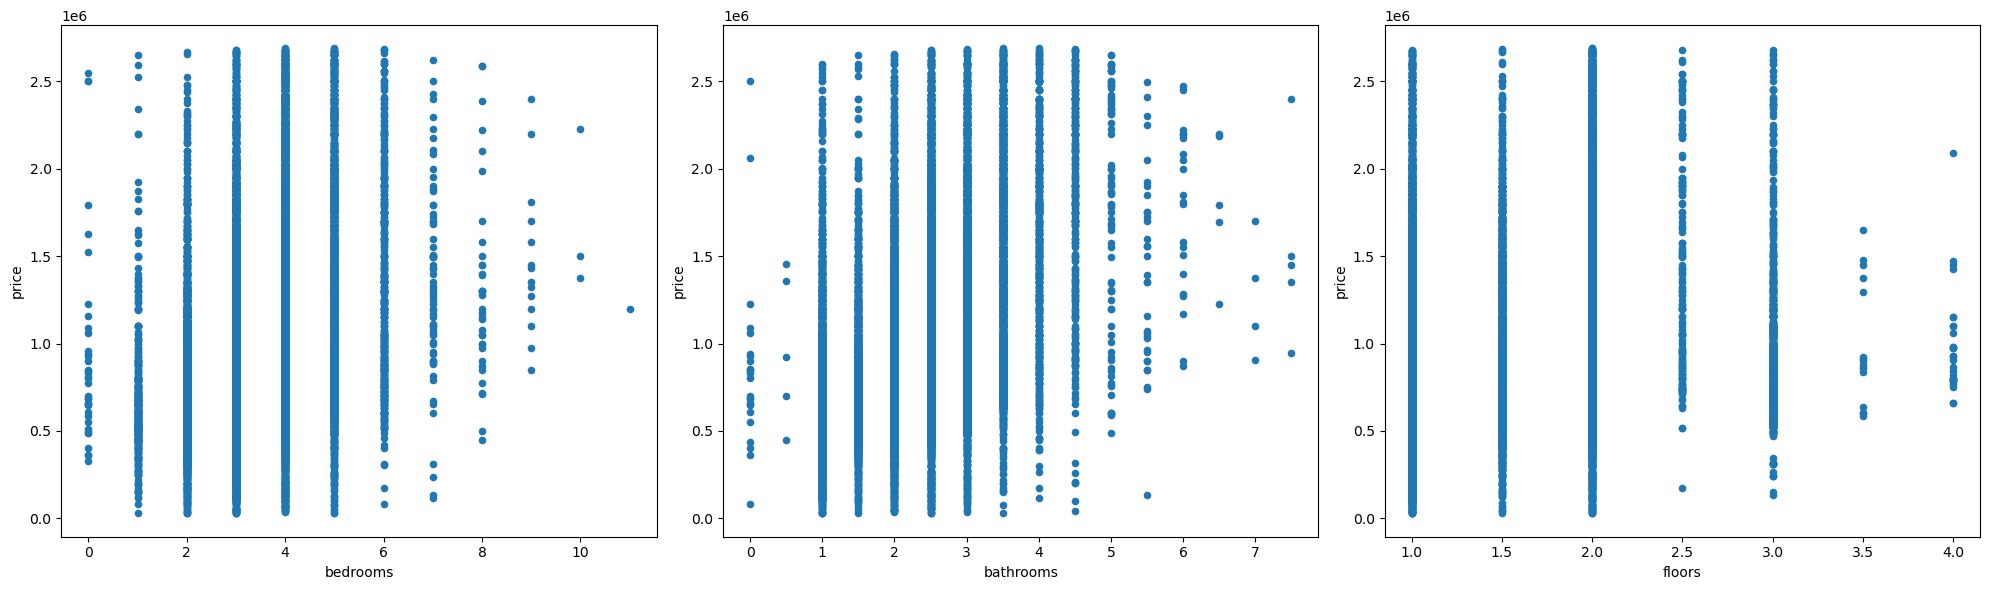

In [16]:
fig, ax = plt.subplots(ncols= 3, figsize = (20,6))
index = 0 
for category in num_categorical[2:]:
    df_cleaned.plot.scatter(category, 'price', ax = ax[index])
    index += 1
plt.tight_layout()

### Categorical Data Type

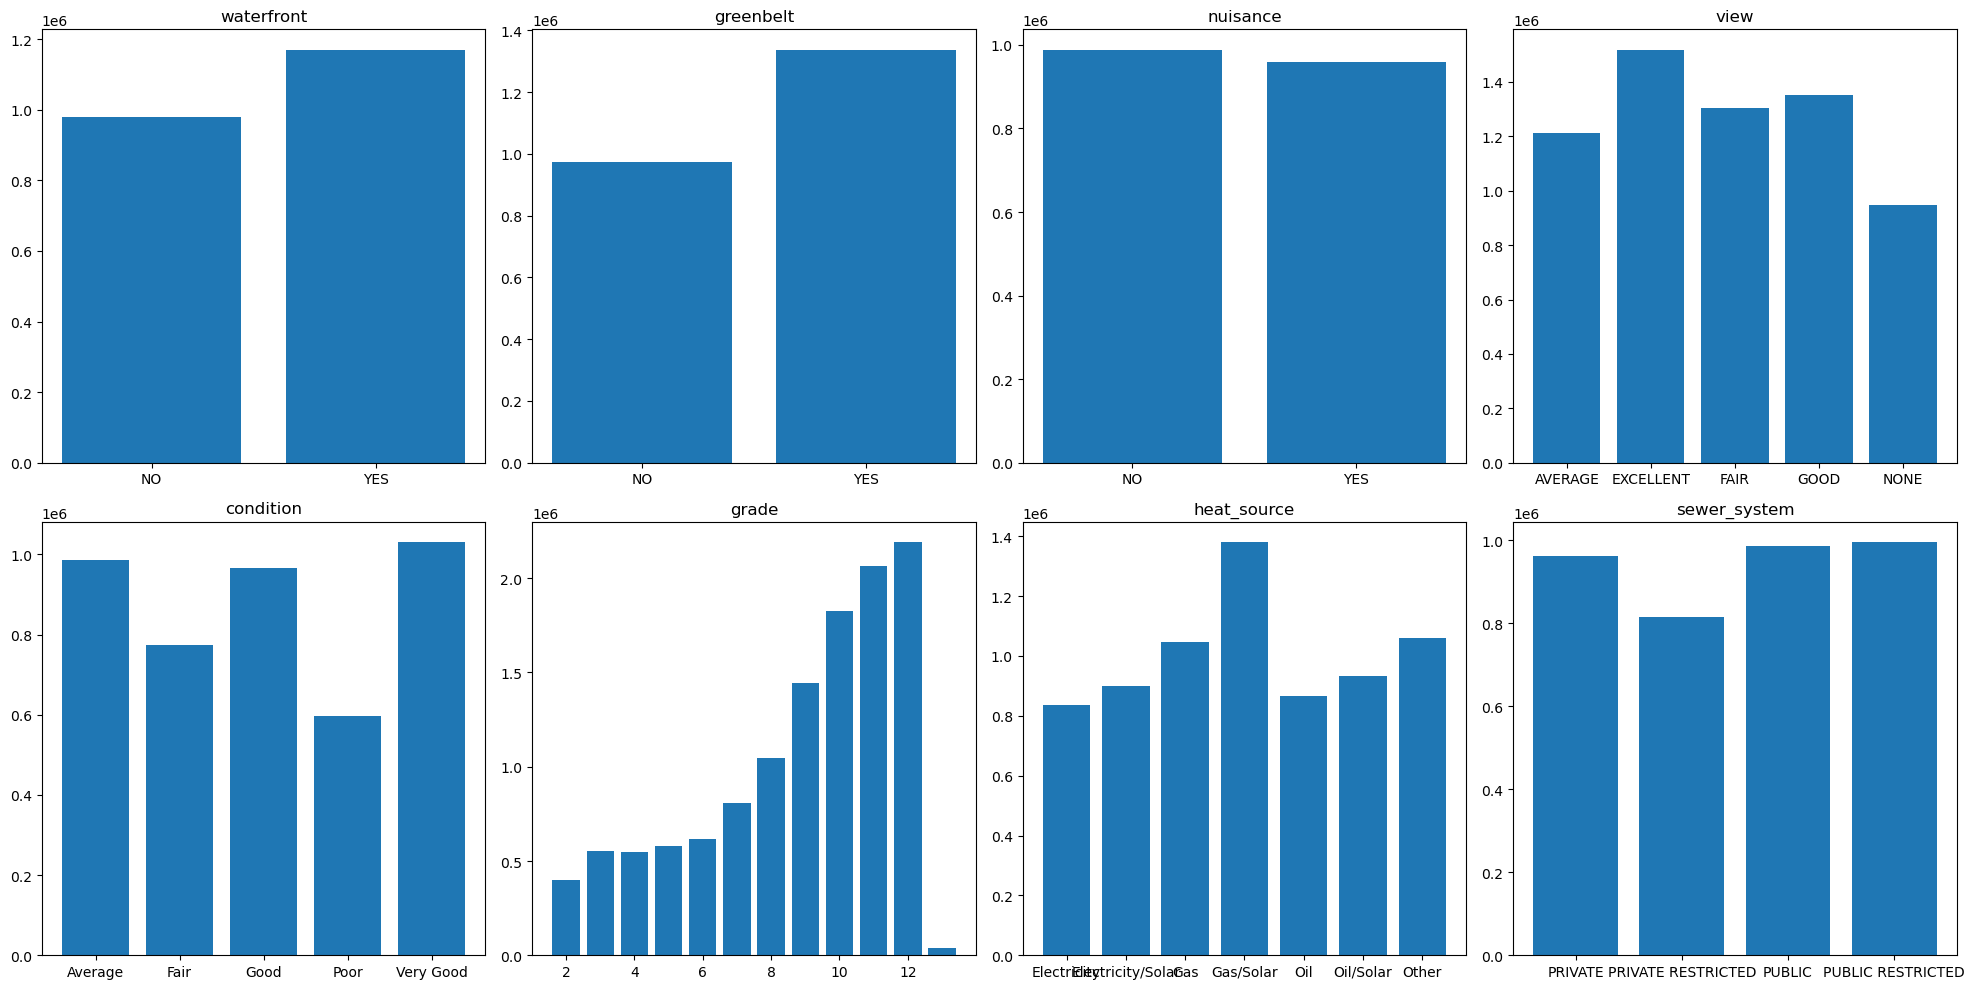

In [17]:
fig, ax = plt.subplots(ncols= 4, nrows = 2, figsize = (20,10))
row = 0 
col = 0
for category in obj_categorical:
    group = df_cleaned[[category, 'price']].groupby(category).mean()
    x_group = [value[0] for value in group.values.tolist()]
    ax[row][col].bar((group.index), x_group)
    ax[row][col].set_title(category)
    df_cleaned[category].value_counts()
    if col == 3:
        row += 1
        col = 0
    else:
        col += 1
plt.tight_layout()

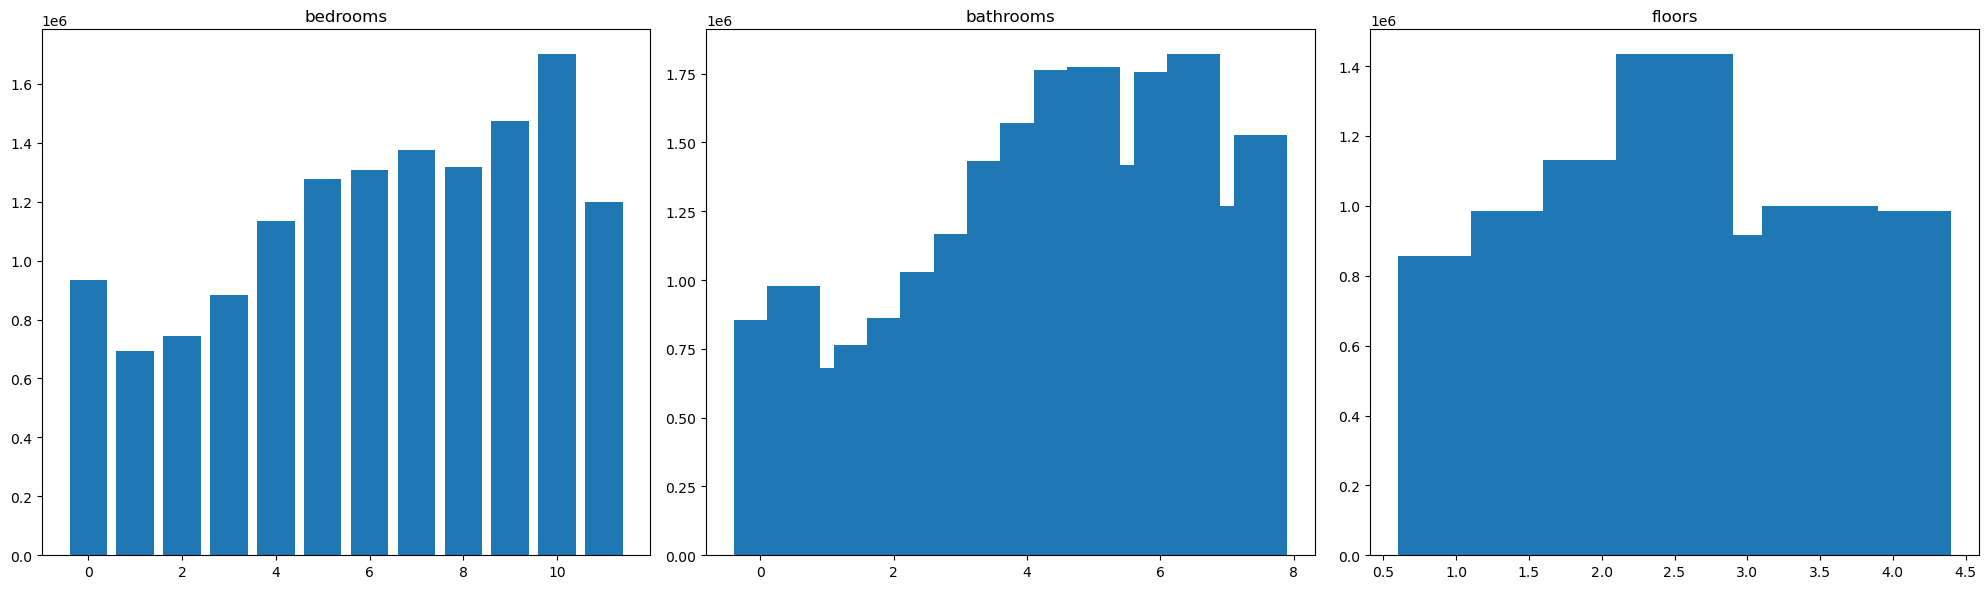

In [18]:
fig, ax = plt.subplots(ncols= 3, figsize = (20,6))
row = 0 
col = 0
for category in num_categorical[2:]:
    group = df_cleaned[[category, 'price']].groupby(category).mean()
    x_group = [value[0] for value in group.values.tolist()]
    ax[col].bar((group.index), x_group)
    ax[col].set_title(category)
    df_cleaned[category].value_counts()

    col += 1
plt.tight_layout()

In [19]:
group_waterfront = df_cleaned[['waterfront', 'price']].groupby('waterfront').mean().values
x_group1 = [value[0] for value in group_waterfront.tolist()]
group_greenbelt = df_cleaned[['greenbelt', 'price']].groupby('greenbelt').mean().values
x_group2 = [value[0] for value in group_greenbelt.tolist()]
group_nuisance = df_cleaned[['nuisance', 'price']].groupby('nuisance').mean().values
x_group3 = [value[0] for value in group_nuisance.tolist()]

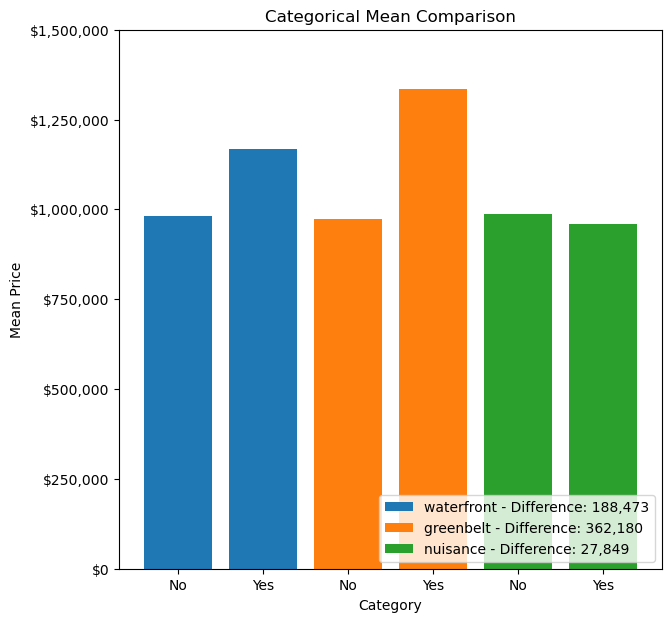

In [20]:
fig, ax = plt.subplots(figsize = (7, 7));    # Setup for plotting 
label = ['waterfront', 'greenbelt', 'nuisance']    #Labels for the legend and labels
r = np.arange(2)    # Spacing for the bar plots
width = 2    # Basic width of each bar
index = 0    # Index through all the groups

### Plot each of the groups side by side for clarity
for group in [x_group1, x_group2, x_group3]:
    ax.bar(r + width * index, group, label = '{} - Difference: {:,}'.format(label[index], abs(round(group[1]-group[0]))));
    index += 1
### Ticks labeling and spacing 
x_ticks = np.arange(6)    
y_ticks = np.arange(0,1750000, 250000)
y_ticks_str = ['${:,}'.format(y) for y in y_ticks]

plt.title('Categorical Mean Comparison');
plt.xlabel('Category')
plt.ylabel('Mean Price');
plt.xticks(x_ticks, ['No','Yes','No','Yes','No','Yes']);

ax.set_yticks(np.arange(0,1750000, 250000));
ax.set_yticklabels(y_ticks_str);

plt.legend(loc = 'lower right');

### Categorical adjustment
There are observation that have very few observation so I will group them up as 'others'. This is only applied to the categorical dataype. <br>
For the numerical observation with few observations, they will be plotted in bar graphs

Results: A house cost more if they are at the waterfront or at a greenbelt. There is a general price increase with the higher conditon and view <br>
None Impactful: Nuisance, whether there is any or not, seems to have no effect on price to make a difference. <br>
Potential Impactful: Heat Source and sewer may have some influence but doesn't seems to be a strong one.  <br>

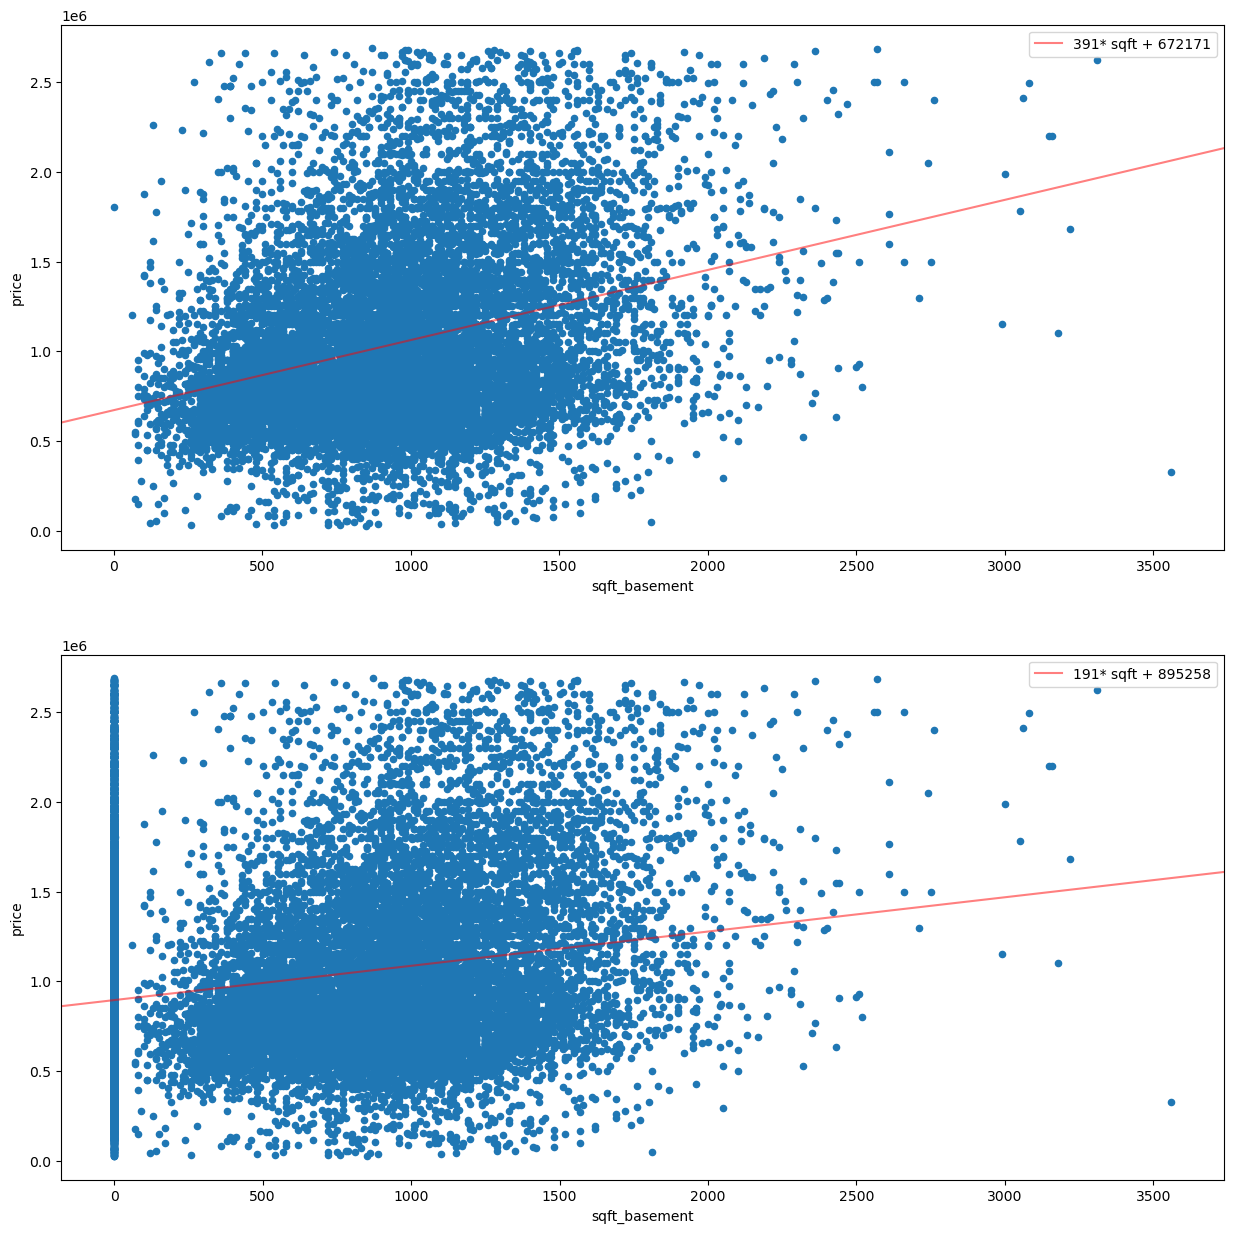

In [21]:
df_basement_0s = df_cleaned.loc[df_cleaned['sqft_basement'] != 0]#.plot.scatter('sqft_basement', y = 'price')
model, result = cc.create_model(df_basement_0s, 'sqft_basement', 'price')
model2, result2 = cc.create_model(df_cleaned, 'sqft_basement', 'price')


fig, ax = plt.subplots(nrows= 2, figsize = (15,15))
df_cleaned.loc[df_cleaned['sqft_basement'] != 0].plot.scatter('sqft_basement', y = 'price', ax = ax[0])
sm.graphics.abline_plot(model_results= result , c = 'r', ax = ax[0], alpha = .5, label = '{}* sqft + {}'.format(round(result.params[1]), round(result.params[0])));
ax[0].legend()

df_cleaned.plot.scatter('sqft_basement', y = 'price', ax = ax[1])
sm.graphics.abline_plot(model_results= result2, c = 'r', ax = ax[1], alpha = .5, label = '{}* sqft + {}'.format(round(result2.params[1]), round(result2.params[0])));
ax[1].legend()

In [22]:
df_cleaned_grouped = df_cleaned.copy()
for column in ['view', 'condition', 'grade',
       'heat_source', 'sewer_system']:
    replace = df_cleaned_grouped[column].value_counts()[df_cleaned_grouped[column].value_counts() < 300].index
    df_cleaned_grouped[column].replace(replace, value= 'other',inplace= True)

In [23]:
df_cleaned_grouped['grade'] = df_cleaned_grouped['grade'].astype(str)
df_cleaned_grouped['grade'].value_counts()

7        11643
8         9288
9         3545
6         2829
10         970
5          381
other      240
Name: grade, dtype: int64

In [24]:
df_dummy_other = pd.get_dummies(df_cleaned_grouped, drop_first= True)
for level in [5,6,7,8,9,'other']:
    df_dummy_other['grade{}*living'.format(level)] = df_dummy_other['grade_{}'.format(level)] * df_dummy_other['sqft_living']

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     1154.
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:54:46   Log-Likelihood:            -4.1017e+05
No. Observations:               28896   AIC:                         8.204e+05
Df Residuals:                   28871   BIC:                         8.206e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.777e+06   8

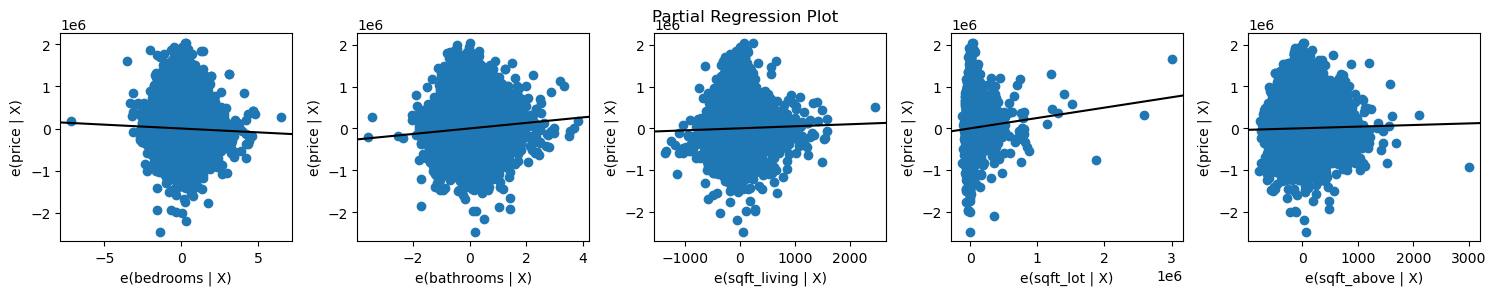

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


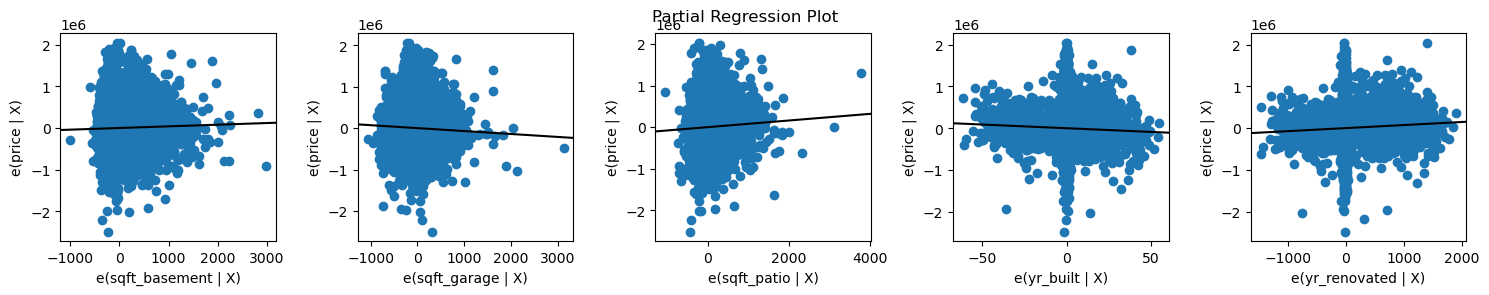

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


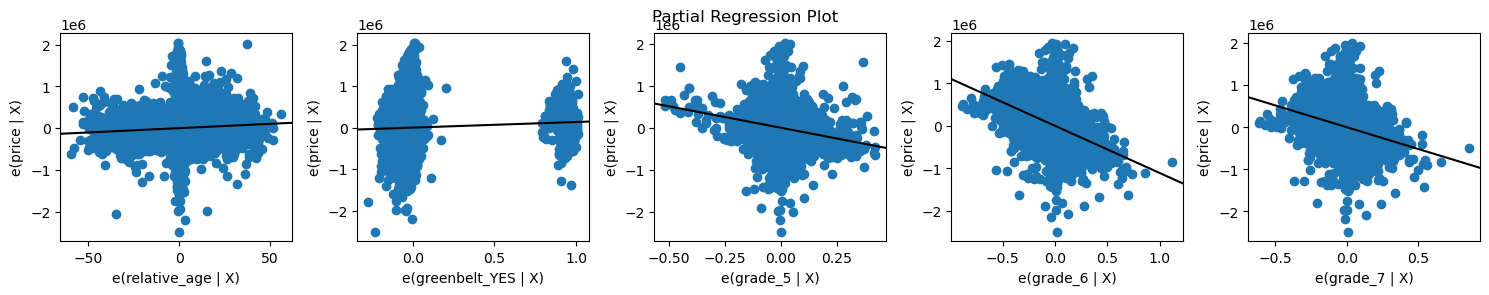

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


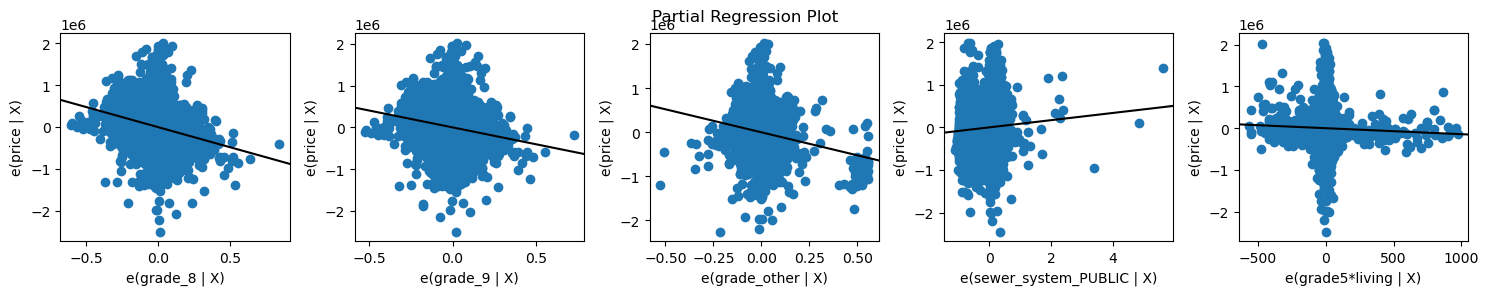

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


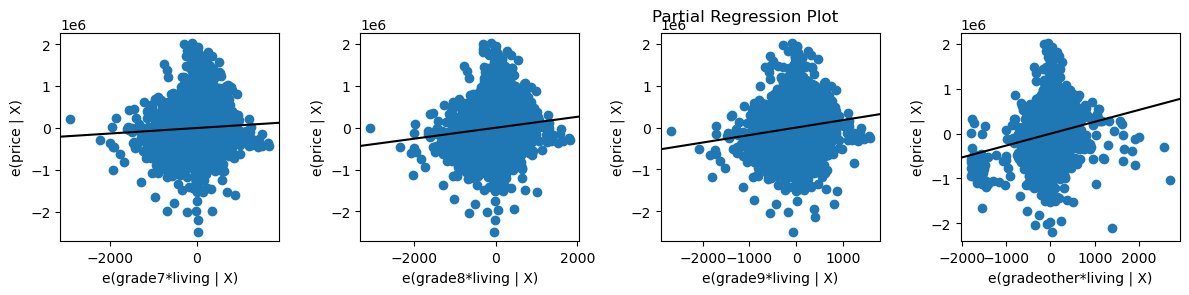

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

In [25]:
X = df_dummy_other[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'relative_age', 'greenbelt_YES', 
        'grade_5', 'grade_6', 'grade_7', 'grade_8',
       'grade_9', 'grade_other',
    'sewer_system_PUBLIC', 
       'grade5*living', 'grade7*living', 'grade8*living',
       'grade9*living', 'gradeother*living']]
y = df_dummy_other['price']
model_dummies = sm.OLS(y, sm.add_constant(X))
results_dummies = model_dummies.fit()
print(results_dummies.summary())

for index in np.arange(0,40,5):
    fig = plt.figure(figsize=(15,8))
    sm.graphics.plot_partregress_grid(
        results_dummies,
        exog_idx=list(X.columns[index:index + 5].values),
        grid=(3,5),
        fig=fig);
    plt.show();

In [26]:
df_cleaned

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,...,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,house_age,relative_age
0,675000.0,4,1.0,1177,7140,1.0,NO,NO,NO,NONE,...,Gas,PUBLIC,1180,0,0,40,1969,0,53,53
1,920000.0,5,2.5,2767,6703,1.0,NO,NO,YES,AVERAGE,...,Oil,PUBLIC,1570,1570,0,240,1950,0,72,72
2,311000.0,6,2.0,2877,6156,1.0,NO,NO,NO,AVERAGE,...,Gas,PUBLIC,1580,1580,0,0,1956,0,66,66
3,775000.0,3,3.0,2157,1400,2.0,NO,NO,NO,AVERAGE,...,Gas,PUBLIC,1090,1070,200,270,2010,0,12,12
4,592500.0,2,2.0,1117,758,2.0,NO,NO,YES,NONE,...,Electricity,PUBLIC,1120,550,550,30,2012,0,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,1555000.0,5,2.0,1907,4000,1.5,NO,NO,NO,NONE,...,Oil,PUBLIC,1600,1130,0,210,1921,0,101,101
30151,1313000.0,3,2.0,2017,5800,2.0,NO,NO,NO,FAIR,...,Gas,PUBLIC,2020,0,0,520,2011,0,11,11
30152,800000.0,3,2.0,1617,3600,1.0,NO,NO,YES,NONE,...,Gas,PUBLIC,940,920,240,110,1995,0,27,27
30153,775000.0,3,2.5,2567,2889,2.0,NO,NO,NO,NONE,...,Gas,PUBLIC,1830,740,480,100,2006,0,16,16


In [27]:
df_limited_grade = df_cleaned.loc[(df_cleaned['grade'] == 5) | (df_cleaned['grade'] ==6) | (df_cleaned['grade'] ==7) | (df_cleaned['grade'] ==8) | (df_cleaned['grade'] ==9)]

In [28]:
df_limited_grade['grade'] = df_limited_grade['grade'].astype(str)
df_limited_grade['grade'].value_counts()
df_grade_dum = pd.get_dummies(df_limited_grade, drop_first= True)


In [29]:
for level in [6,7,8,9]:
    df_grade_dum['grade{}*living'.format(level)] = df_grade_dum['grade_{}'.format(level)] * df_dummy_other['sqft_living']

In [30]:
df_grade_dum.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'house_age', 'relative_age', 'waterfront_YES',
       'greenbelt_YES', 'nuisance_YES', 'view_EXCELLENT', 'view_FAIR',
       'view_GOOD', 'view_NONE', 'condition_Fair', 'condition_Good',
       'condition_Poor', 'condition_Very Good', 'grade_6', 'grade_7',
       'grade_8', 'grade_9', 'heat_source_Electricity/Solar',
       'heat_source_Gas', 'heat_source_Gas/Solar', 'heat_source_Oil',
       'heat_source_Oil/Solar', 'heat_source_Other',
       'sewer_system_PRIVATE RESTRICTED', 'sewer_system_PUBLIC',
       'sewer_system_PUBLIC RESTRICTED', 'grade6*living', 'grade7*living',
       'grade8*living', 'grade9*living'],
      dtype='object')

In [31]:
X = df_grade_dum[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'house_age', 'relative_age', 'waterfront_YES',
       'greenbelt_YES', 'condition_Fair', 'condition_Good',
       'condition_Poor', 'condition_Very Good', 'grade_6', 'grade_7',
       'grade_8', 'grade_9',
        'grade6*living', 'grade7*living',
       'grade8*living', 'grade9*living']]
y = df_grade_dum['price']
model_dummies = sm.OLS(y, sm.add_constant(X))
results_dummies = model_dummies.fit()
print(results_dummies.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     890.8
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:54:51   Log-Likelihood:            -3.9222e+05
No. Observations:               27686   AIC:                         7.845e+05
Df Residuals:                   27661   BIC:                         7.847e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.1360    

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


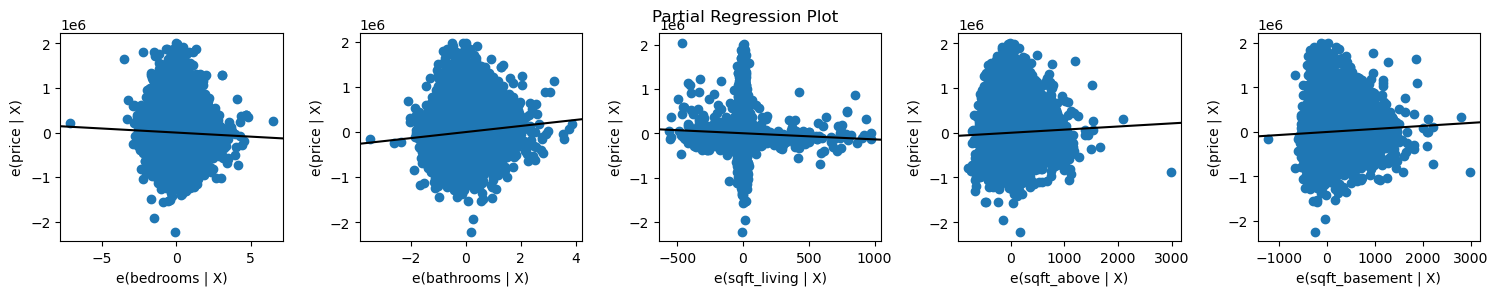

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


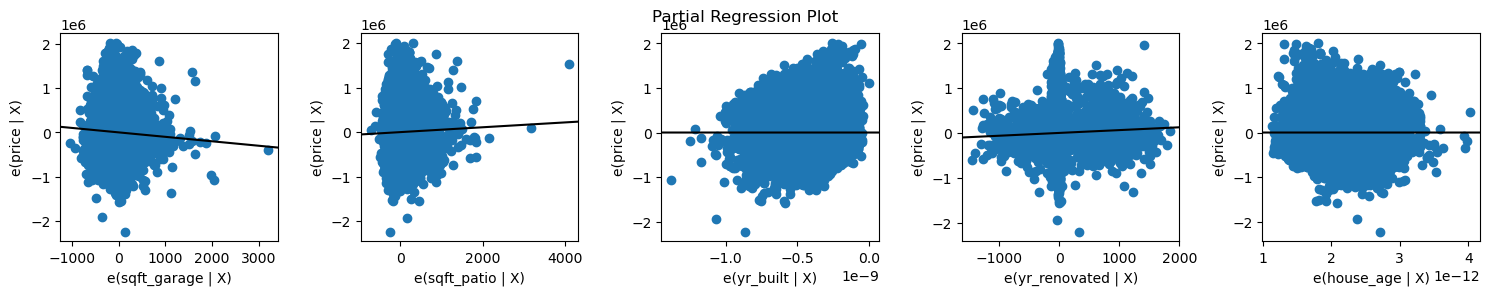

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


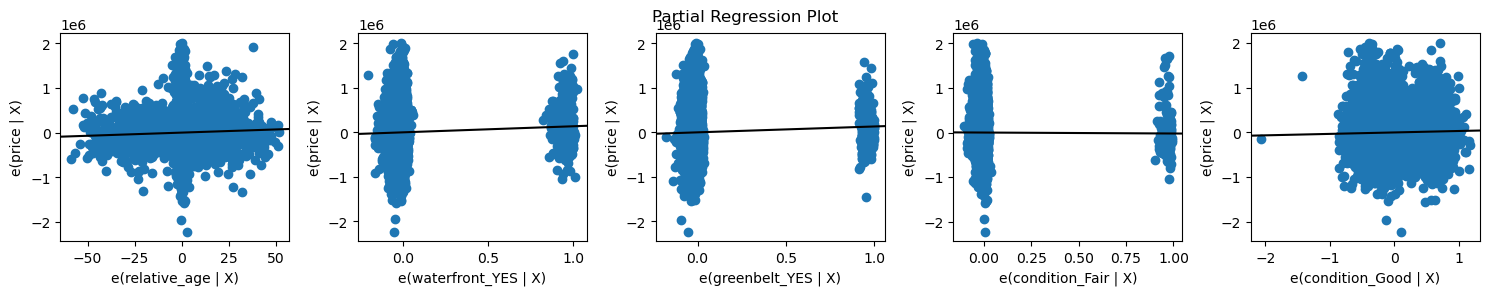

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


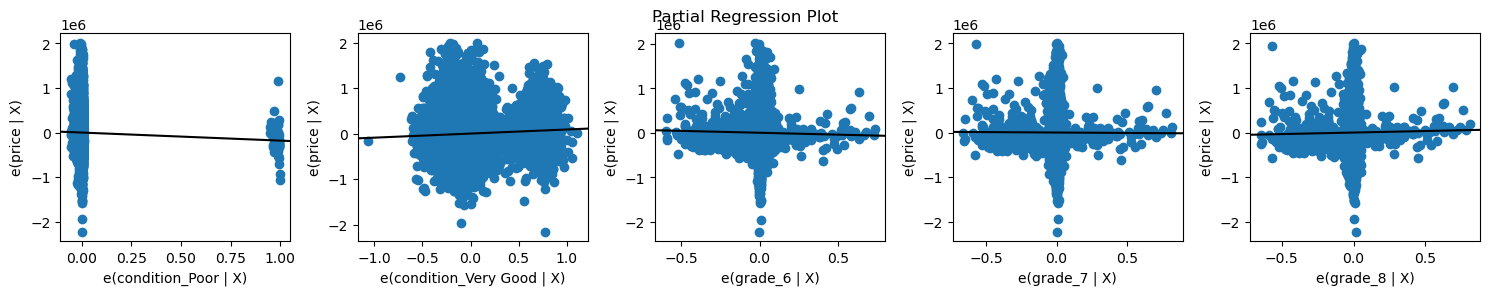

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


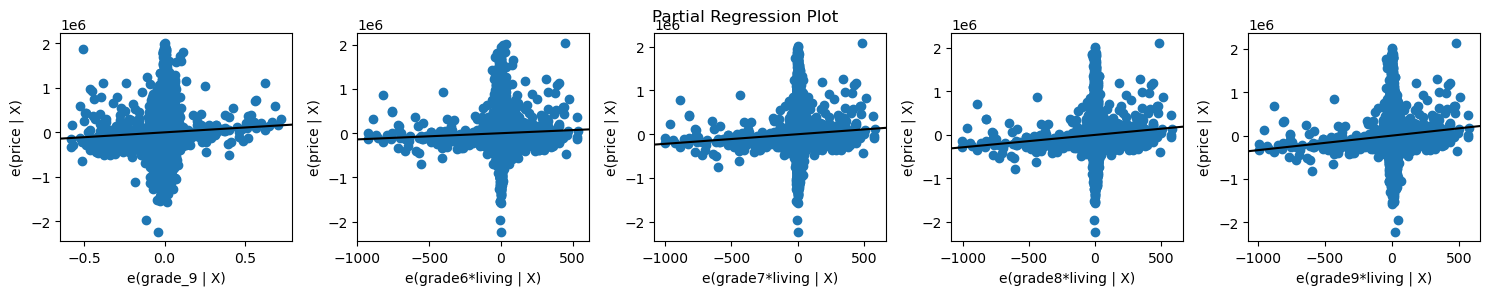

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

In [32]:
for index in np.arange(0,40,5):
    fig = plt.figure(figsize=(15,8))
    sm.graphics.plot_partregress_grid(
        results_dummies,
        exog_idx=list(X.columns[index:index + 5].values),
        grid=(3,5),
        fig=fig);
    plt.show();

## Testing Log On Sqft_living

In [33]:
#1. Only sqft_living
X = df_cleaned['sqft_living']
y = df_cleaned['price']
model_1 = sm.OLS(y, sm.add_constant(X))
result_1 = model_1.fit()
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                 1.642e+04
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:54:56   Log-Likelihood:            -4.1338e+05
No. Observations:               28896   AIC:                         8.268e+05
Df Residuals:                   28894   BIC:                         8.268e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         2.62e+05   6086.650     43.052      

## Testing Other Grade and Grouping 

## Year vs grade

<AxesSubplot:xlabel='house_age', ylabel='grade'>

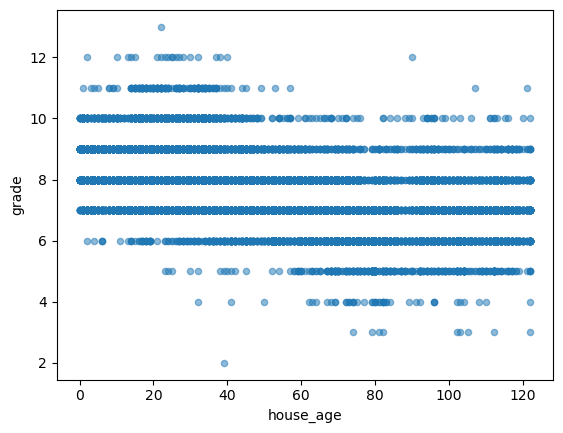

In [34]:
df_cleaned.plot.scatter('house_age',  'grade', alpha = .5)

In [35]:
for num in range(13):
    count = len(df_cleaned['grade'].loc[df_cleaned['grade'] == num])
    print(num, count, round(100*count/len(df_cleaned),2))

0 0 0.0
1 0 0.0
2 1 0.0
3 9 0.03
4 45 0.16
5 381 1.32
6 2829 9.79
7 11643 40.29
8 9288 32.14
9 3545 12.27
10 970 3.36
11 164 0.57
12 20 0.07


7.563503599114064

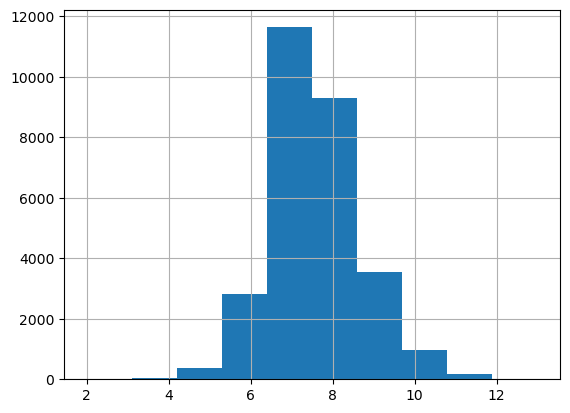

In [36]:
df_cleaned['grade'].hist()
df_cleaned['grade'].mean()

## Year and Renovated

<AxesSubplot:xlabel='yr_built', ylabel='yr_renovated'>

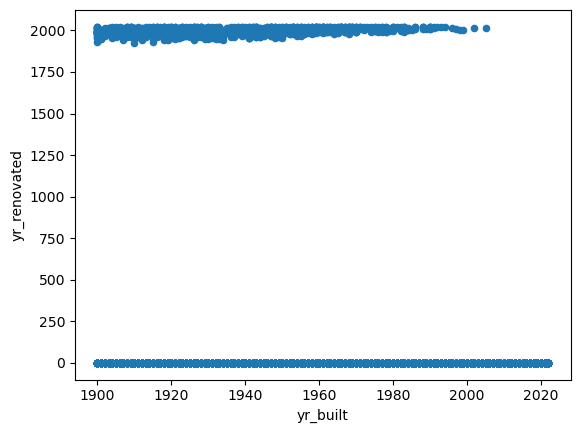

In [37]:
df_cleaned.plot.scatter('yr_built','yr_renovated')

In [38]:
(df_cleaned['yr_renovated'] != 0).sum() / len(df_cleaned) * 100

4.260105204872647

## View and Greenbelt and Waterfront

In [39]:
df_cleaned[['view', 'greenbelt', 'waterfront']].loc[(df_cleaned['greenbelt'] == 'YES') | (df_cleaned['waterfront'] == 'YES')].value_counts()

view       greenbelt  waterfront
NONE       YES        NO            656
EXCELLENT  NO         YES           142
AVERAGE    NO         YES            88
GOOD       NO         YES            71
NONE       NO         YES            45
AVERAGE    YES        NO             40
GOOD       YES        NO             18
EXCELLENT  YES        NO              3
dtype: int64

In [40]:
df_cleaned[['view', 'greenbelt', 'waterfront']].loc[(df_cleaned['view'] == 'EXCELLENT')].value_counts()

view       greenbelt  waterfront
EXCELLENT  NO         NO            194
                      YES           142
           YES        NO              3
dtype: int64

In [41]:
df_cleaned['yr_built'].min()

1900

In [42]:
df_cleaned['price'].describe()

count    2.889600e+04
mean     9.828658e+05
std      4.947793e+05
min      2.736000e+04
25%      6.379990e+05
50%      8.450000e+05
75%      1.230000e+06
max      2.689000e+06
Name: price, dtype: float64

# RFE 

In [43]:
X = df_dummy.drop('price', axis = 1)
y = df_dummy['price']

In [ ]:
rfe = RFE(estimator= DecisionTreeClassifier())
rfe.fit(X,y)

In [ ]:
for i, col in zip(range(X.shape[1]), X.columns):
    if rfe.support_[i] == True:
        print(f"{col} selected = {rfe.support_[i]} rank = {rfe.ranking_[i]}")

In [ ]:
df_dummy.columns

In [ ]:
final_refer = ['waterfront_NO', 'greenbelt_NO', 'nuisance_NO', 'view_NONE', 'condition_Average', 'heat_source_Oil', 'sewer_system_PRIVATE']    ## When creating dummy variables, the data need a reference to avoid the dummy trap. 

df_other = df_cleaned.copy()
df_other['grade'] = df_other['grade'].astype(str)
df_final = pd.get_dummies(df_other)
df_final.drop(final_refer, axis = 1, inplace= True)
df_final.drop('grade_7', axis = 1, inplace =True)


In [ ]:
df_final.columns

In [ ]:
X = df_final.drop('price', axis = 1)
y = df_final['price']
rfe = RFE(estimator= DecisionTreeClassifier())
rfe.fit(X,y)

In [ ]:
x_list = []
for i, col in zip(range(X.shape[1]), X.columns):
    if rfe.support_[i] == True:
        print(f"{col} selected = {rfe.support_[i]} rank = {rfe.ranking_[i]}")
        x_list.append(col)

In [ ]:
X = df_final[x_list]
y = df_final['price']
rfe_model = sm.OLS(y, sm.add_constant(X))
rfe_result = rfe_model.fit()
print(rfe_result.summary())

In [ ]:
for level in [2,3,4,5,6,8,9,10,11,12,13]:
    df_final['grade{}*living'.format(level)] = df_final['grade_{}'.format(level)] * df_final['sqft_living']

In [ ]:
X = df_final.drop('price', axis = 1)
y = df_final['price']
rfe = RFE(estimator= DecisionTreeClassifier())
rfe.fit(X,y)

In [ ]:
x_list = []
for i, col in zip(range(X.shape[1]), X.columns):
    if rfe.support_[i] == True:
        print(f"{col} selected = {rfe.support_[i]} rank = {rfe.ranking_[i]}")
        x_list.append(col)
        


In [ ]:
x_list

In [ ]:
x_add_grade = (x_list + ['grade_6', 'grade_9', 'grade_10'])
X = df_final[x_add_grade]
y = df_final['price']
rfe_model = sm.OLS(y, sm.add_constant(X))
rfe_result = rfe_model.fit()
print(rfe_result.summary())

In [ ]:
x_not = []
for i, col in zip(range(X.shape[1]), X.columns):
    if rfe.support_[i] == False:
        print(f"{col} selected = {rfe.support_[i]} rank = {rfe.ranking_[i]}")
        x_not.append(col)

In [ ]:
X = df_final.drop(['price', 'sqft_above', 'yr_built', 'relative_age'], axis = 1)
y = df_final['price']
rfe = RFE(estimator= DecisionTreeClassifier(), n_features_to_select= 10)
rfe.fit(X,y)

In [ ]:
x_list = []
for i, col in zip(range(X.shape[1]), X.columns):
    if rfe.support_[i] == True:
        print(f"{col} selected = {rfe.support_[i]} rank = {rfe.ranking_[i]}")